In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [6]:
titanic_df = pd.read_csv("titanic-passengers.csv", sep=";")

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [9]:
replacement_dict = {"Survived":{"Yes":1, "No":0},
                    "Sex":{"female":1,"male":0}}

titanic_df.replace(replacement_dict,inplace=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,NaN,0,0,349215,7.8958,NaN,S


In [20]:
#features extraction
x = titanic_df[['Sex']]
y = titanic_df['Survived']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy = {:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix_results = metrics.confusion_matrix(y_test, y_pred)

Accuracy = 0.83


In [21]:
#features extraction
x1 = titanic_df[['Age']]
y1 = titanic_df['Survived']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y1_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy = {:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix_results_1 = metrics.confusion_matrix(y1_test, y1_pred)

Accuracy = 0.83


 True-Positive|False-Positive
False-Negative|True-Negative


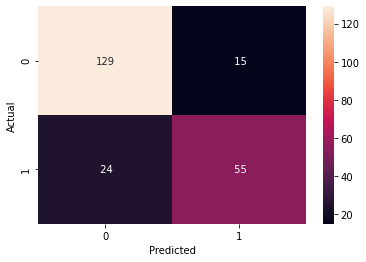

In [36]:
confusion_matrix_results = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_results,fmt="3", annot=True)
print(" True-Positive|False-Positive")
print("False-Negative|True-Negative")

 True-Positive|False-Positive
False-Negative|True-Negative


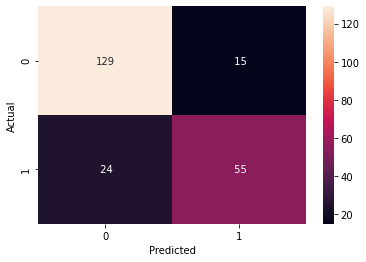

In [37]:
confusion_matrix_results_1 = pd.crosstab(y1_test, y1_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_results_1,fmt="3", annot=True)
print(" True-Positive|False-Positive")
print("False-Negative|True-Negative")

# ROC/AUC Curves

The ROC/AUC curves are plotting the relationship between the false positive rates and the true positive rates as the threshold for positive hits is varied. The area under the curve represents the amount of true positives. It returns a value of 1.0 at perfect scores and falls to 0.0 as the false positives increase.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.796


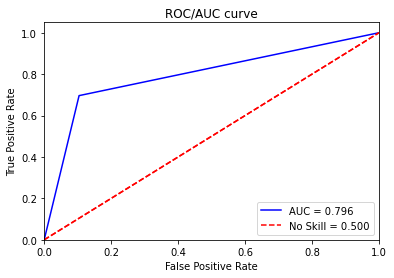

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,logreg.predict_proba(x_test)[:,1] )
auc = metrics.roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])

ns_probs = [0 for _ in range(len(y_test))]
ns_auc =  metrics.roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)

plt.title("ROC/AUC curve")
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.plot(ns_fpr,ns_tpr, 'r--', label = 'No Skill = %0.3f' % ns_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc = 'lower right')

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (auc))